# Format convert 
Change the formating of the accelerometer measurements taking by the AX3, Equivital, and Movesense devices to a common standard:

"DevType_DATETIME.csv"
DATETIME specifying the start time of the recording according to the device clock
inside columns: Time (ms), X, Y, Z


In [1]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json 
from scipy.signal import butter,filtfilt
from scipy import interpolate
from scipy.interpolate import interp1d

,Time,X,Y,Z
0,0.0,-0.500000,-0.265625,-0.968750
1,5.0,-0.531250,-0.062500,-0.593750
2,9.0,-0.546875,-0.046875,-0.671875
3,15.0,-0.546875,-0.046875,-0.718750
4,19.0,-0.531250,-0.031250,-0.750000
...,...,...,...,...
310075,1590439.0,-0.468750,0.328125,-0.859375
310076,1590444.0,-0.453125,0.296875,-0.812500
310077,1590449.0,-0.468750,0.343750,-0.875000
310078,1590454.0,-0.453125,0.343750,-0.875000


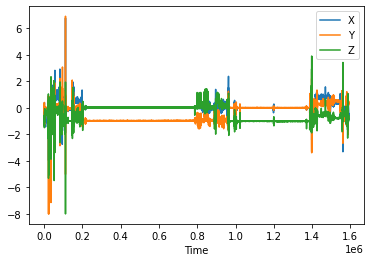

In [73]:
# AX3 1

fileLoc = './RawMeasures/AX3_FEB03/17301_0000000001.csv' # 17301_0000000001.resampled.csv
df=pd.read_csv(fileLoc,header=None,names = ['DateTime','X','Y','Z'])
df['DateTime'] = pd.to_datetime(df.loc[:,'DateTime'])
start_time = df['DateTime'][0]
df['Time'] = (df['DateTime'] - start_time).dt.total_seconds()*1000
df.plot(x='Time',y = ['X','Y','Z'])

#v = 1000*(df['Time'] - start_time).dt.Seconds()

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/AX3_ACC_' +start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df_out

2023-01-31 15:49:08.485000


,DateTime,X,Y,Z,Time
0,2023-01-31 15:49:08.485,-0.265625,0.187500,0.765625,0.0
1,2023-01-31 15:49:08.489,-0.187500,0.812500,0.437500,4.0
2,2023-01-31 15:49:08.494,-0.171875,0.750000,0.484375,9.0
3,2023-01-31 15:49:08.500,-0.171875,0.671875,0.531250,15.0
4,2023-01-31 15:49:08.505,-0.171875,0.562500,0.578125,20.0
...,...,...,...,...,...
295195,2023-01-31 16:13:38.959,0.140625,0.000000,0.843750,1470474.0
295196,2023-01-31 16:13:38.965,0.125000,0.000000,0.828125,1470480.0
295197,2023-01-31 16:13:38.970,0.125000,0.000000,0.812500,1470485.0
295198,2023-01-31 16:13:38.974,0.109375,0.015625,0.812500,1470489.0


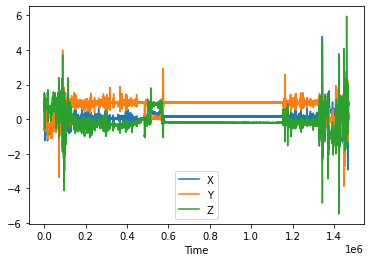

In [74]:
fileLoc = './RawMeasures/AX3_JAN31/ARJStandstill_17753_0000000001.csv' # 17301_0000000001.resampled.csv
# insane error : 15:49:60.000 instead of 15:50:00.000 !! manually fixed in file
df=pd.read_csv(fileLoc,header=None,names = ['DateTime','X','Y','Z'])
df['DateTime'] = pd.to_datetime(df.loc[:,'DateTime'])
start_time = df['DateTime'][0]
print(start_time)
df['Time'] = (df['DateTime'] - start_time).dt.total_seconds()*1000
df.plot(x='Time',y = ['X','Y','Z'])

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/AX3_ACC_' +start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df

2023-01-31 14:37:37.039000+00:00


,DateTime,Breathing,Vert Accelerometer,Lat Accelerometer,Long Accelerometer,Time,Z,Y,X
0,2023-01-31 14:37:37.039000+00:00,NaN,-43,998,59,0.0,-43,998,59
1,2023-01-31 14:37:37.078000+00:00,505.0,-27,956,47,39.0,-27,956,47
2,2023-01-31 14:37:37.117000+00:00,505.0,47,975,43,78.0,47,975,43
3,2023-01-31 14:37:37.156000+00:00,505.0,74,1002,43,117.0,74,1002,43
4,2023-01-31 14:37:37.195000+00:00,504.0,35,956,12,156.0,35,956,12
...,...,...,...,...,...,...,...,...,...
58754,2023-01-31 15:15:52.144000+00:00,553.0,-90,-35,-959,2295105.0,-90,-35,-959
58755,2023-01-31 15:15:52.183000+00:00,553.0,-90,-35,-959,2295144.0,-90,-35,-959
58756,2023-01-31 15:15:52.222000+00:00,552.0,-86,-39,-956,2295183.0,-86,-39,-956
58757,2023-01-31 15:15:52.261000+00:00,552.0,-94,-35,-963,2295222.0,-94,-35,-963


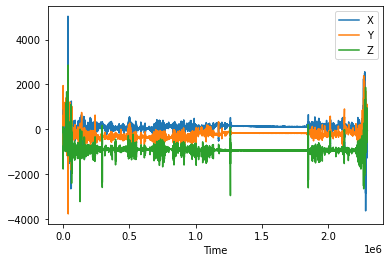

In [75]:
#Equivital

fileLoc = './RawMeasures/EQUIVITAL_CSV/RESPACC-Pilot_1-3420755-23013100.CSV' # 17301_0000000001.resampled.csv
# insane error : 15:49:60.000 instead of 15:50:00.000 !! manually fixed in file
df = pd.read_csv(fileLoc,skipinitialspace=True)
# df=pd.read_csv(fileLoc,header=None,names = ['DateTime','X','Y','Z'])
df['DateTime'] = pd.to_datetime(df.loc[:,'DateTime'])
start_time = df['DateTime'][0]
print(start_time)
df['Time'] = (df['DateTime'] - start_time).dt.total_seconds()*1000
df.loc[:,'Z'] = df.loc[:,'Vert Accelerometer']
df.loc[:,'Y'] = df.loc[:,'Lat Accelerometer'] # is this the right X and Y mapping?
df.loc[:,'X'] = df.loc[:,'Long Accelerometer']
df.plot(x='Time',y = ['X','Y','Z'])

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/Equivital_ACC_' +start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df

2023-02-03 11:39:37.039000+00:00


,DateTime,Breathing,Vert Accelerometer,Lat Accelerometer,Long Accelerometer,Time,Z,Y,X
0,2023-02-03 11:39:37.039000+00:00,NaN,-47,-55,-959,0.0,-47,-55,-959
1,2023-02-03 11:39:37.078000+00:00,521.0,-35,-23,-1037,39.0,-35,-23,-1037
2,2023-02-03 11:39:37.117000+00:00,528.0,-47,-109,-998,78.0,-47,-109,-998
3,2023-02-03 11:39:37.156000+00:00,532.0,-27,-62,-1073,117.0,-27,-62,-1073
4,2023-02-03 11:39:37.195000+00:00,534.0,-43,-51,-1006,156.0,-43,-51,-1006
...,...,...,...,...,...,...,...,...,...
41803,2023-02-03 12:06:49.980000+00:00,511.0,-101,-59,-928,1632941.0,-101,-59,-928
41804,2023-02-03 12:06:50.019000+00:00,511.0,-101,20,-932,1632980.0,-101,20,-932
41805,2023-02-03 12:06:50.058000+00:00,511.0,-125,-335,-889,1633019.0,-125,-335,-889
41806,2023-02-03 12:06:50.097000+00:00,510.0,-113,-23,-936,1633058.0,-113,-23,-936


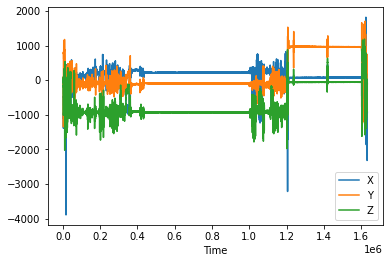

In [76]:
#Equivital

fileLoc = './RawMeasures/EQUIVITAL_CSV/RESPACC-Pilot_2-3420456-23020300.CSV' # 17301_0000000001.resampled.csv
# insane error : 15:49:60.000 instead of 15:50:00.000 !! manually fixed in file
df = pd.read_csv(fileLoc,skipinitialspace=True)
# df=pd.read_csv(fileLoc,header=None,names = ['DateTime','X','Y','Z'])
df['DateTime'] = pd.to_datetime(df.loc[:,'DateTime'])
start_time = df['DateTime'][0]
print(start_time)
df['Time'] = (df['DateTime'] - start_time).dt.total_seconds()*1000
df.loc[:,'Z'] = df.loc[:,'Vert Accelerometer']
df.loc[:,'Y'] = df.loc[:,'Lat Accelerometer'] # is this the right X and Y mapping?
df.loc[:,'X'] = df.loc[:,'Long Accelerometer']
df.plot(x='Time',y = ['X','Y','Z'])

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/Equivital_ACC_' +start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df

2023-01-31 14:57:27


,timestamp,x,y,z,Time,Z,Y,X
0,338757,-0.172289,9.250982,3.280677,0,3.280677,9.250982,-0.172289
1,338761,-0.141182,9.207911,3.357250,4,3.357250,9.207911,-0.141182
2,338766,-0.208183,9.155267,3.309392,9,3.309392,9.155267,-0.208183
3,338771,-0.215362,9.097836,3.323749,14,3.323749,9.097836,-0.215362
4,338776,-0.291935,9.136123,3.314178,19,3.314178,9.136123,-0.291935
...,...,...,...,...,...,...,...,...
148891,1045998,1.340029,9.181588,3.469717,707241,3.469717,9.181588,1.340029
148892,1046003,1.366351,9.160052,3.503217,707246,3.503217,9.160052,1.366351
148893,1046007,1.313707,9.128944,3.579791,707250,3.579791,9.128944,1.313707
148894,1046012,1.301742,9.121766,3.622863,707255,3.622863,9.121766,1.301742


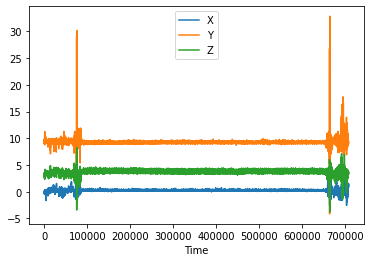

In [77]:
#Movesense
sessF = '20230131T145727Z_223130000594_acc_stream.csv'
data_loc = './RawMeasures/Movesense/' # 17301_0000000001.resampled.csv
# insane error : 15:49:60.000 instead of 15:50:00.000 !! manually fixed in file
df = pd.read_csv(data_loc + sessF)
dets = sessF.split('_')
start_time = dt.datetime.strptime(dets[0][:-1],'%Y%m%dT%H%M%S')
print(start_time)
df['Time'] = (df['timestamp']-df.loc[0,'timestamp']) # already in ms, int

df.loc[:,'Z'] = df.loc[:,'z']
df.loc[:,'Y'] = df.loc[:,'y'] # is this the right X and Y mapping?
df.loc[:,'X'] = df.loc[:,'x']
df.plot(x='Time',y = ['X','Y','Z'])

df_out = df.loc[:,['Time','X','Y','Z']]
df_out.to_csv('./OUTFILES/Movesense_ACC_' + start_time.strftime('%Y%m%dT%H%M%S%f')[:-3] + '.csv' )

df

In [72]:
start_time.strftime('%Y%m%dT%H%M%S%f')[:-3]# d.strftime('%Y-%m-%dT%H:%M:%S.%f')[:-3]

'20230131T145727000'